# Exploration of MNIST dataset

## Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist 

/Users/mercedeszlehoczky/Downloads/DSToolkits/testenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Load MNIST data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Display a sample of images

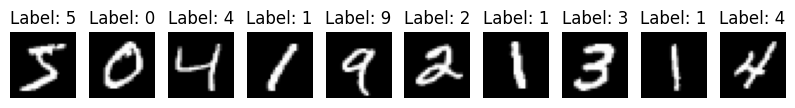

In [4]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

## Describe the dataset

In [5]:
print(f"Number of training examples: {len(x_train)}")
print(f"Number of test examples: {len(x_test)}")
print(f"Image shape: {x_train[0].shape}")
print(f"Unique labels: {np.unique(y_train)}")

Number of training examples: 60000
Number of test examples: 10000
Image shape: (28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


##  Visualize the distribution of labels

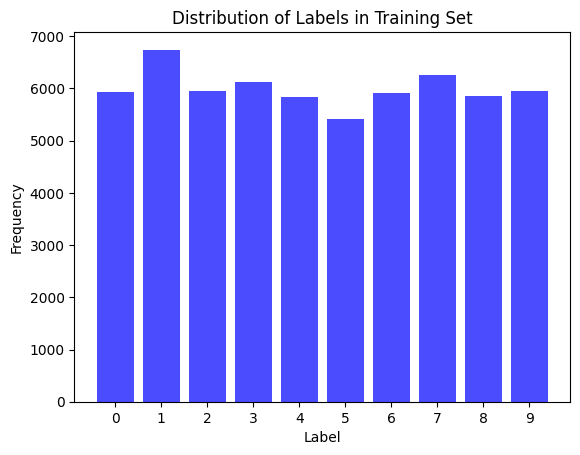

In [6]:
plt.figure()
plt.hist(y_train, bins=np.arange(11) - 0.5, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.show()
